# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0383 Бояркин Никита и Сергевнин Дмитрий. Вариант №19.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретный сигнал:

$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

Спектр дискретного сигнала:

$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$

Последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$.

Дискретное преобразование Фурье (ДПФ):

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

Обратное дискретное преобразование Фурье (ОДПФ):

$$x_k=\frac1n \sum_{n=0}^{N-1} X(n)e^{i\frac{2 \pi k}{N}n}, \quad k=0,1,2,...,N-1$$

**Сглаживание входного сигнала** — приближение (в смысле МНК) сигнала $s(t)$ функцией $y(t)$ по $N$ точкам:

$$\sum_{k=0}^{N}(s_k-y_k)^2 \Rightarrow min$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Импорт необходимых модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Сформируем дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

In [2]:
# Заданные параметры
N = 31
T = 1
delta_omega = 0.1 * np.pi

# Генерация случайных амплитуд и нормализация амплитуд
amplitudes = np.random.randint(1, 12, 11)
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, 11)

frequencies = np.arange(0, np.pi + delta_omega, delta_omega)


time_d = np.arange(0, N + T, T)
time_a = np.arange(0, N + 0.01, 0.01)

# Формирование сигнала

def signal(time):
    signal = 0
    for k in range(11):
        signal += amplitudes[k] * np.cos(frequencies[k] * time + phases[k])
    return signal

2. Визуализируем исходные аналоговый и дискретизированный сигналы.

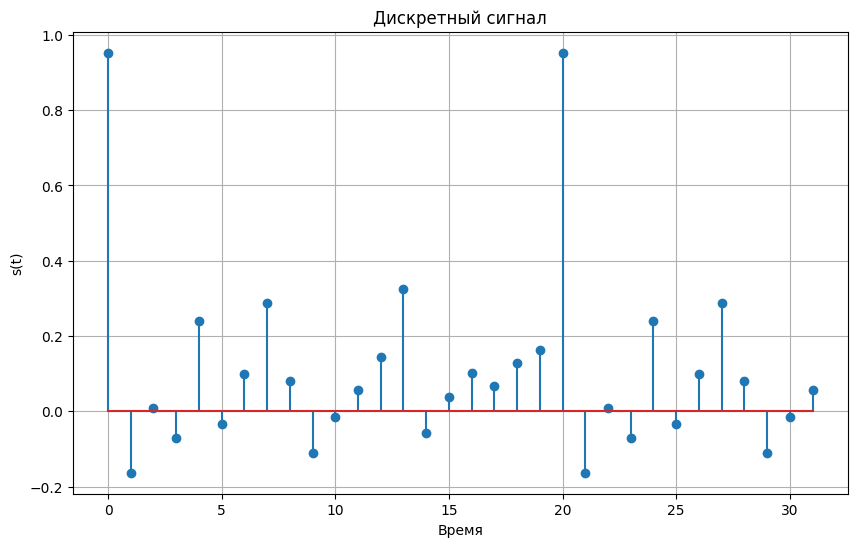

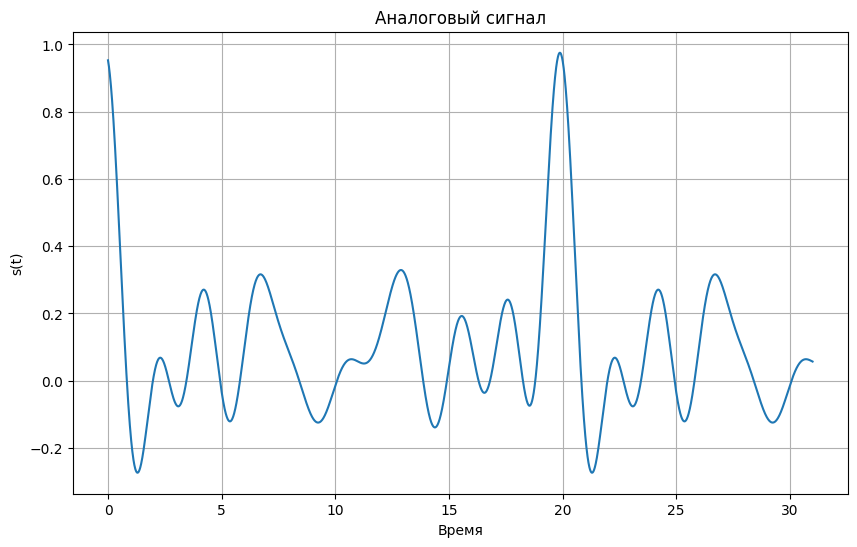

In [3]:
# Визуализация сигнала
plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d))
plt.xlabel('Время')
plt.ylabel('s(t)')
plt.title('Дискретный сигнал')
plt.grid()
plt.show()


# Визуализация сигнала
plt.figure(figsize=(10, 6))
plt.plot(time_a, signal(time_a))
plt.xlabel('Время')
plt.ylabel('s(t)')
plt.title('Аналоговый сигнал')
plt.grid()
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их.

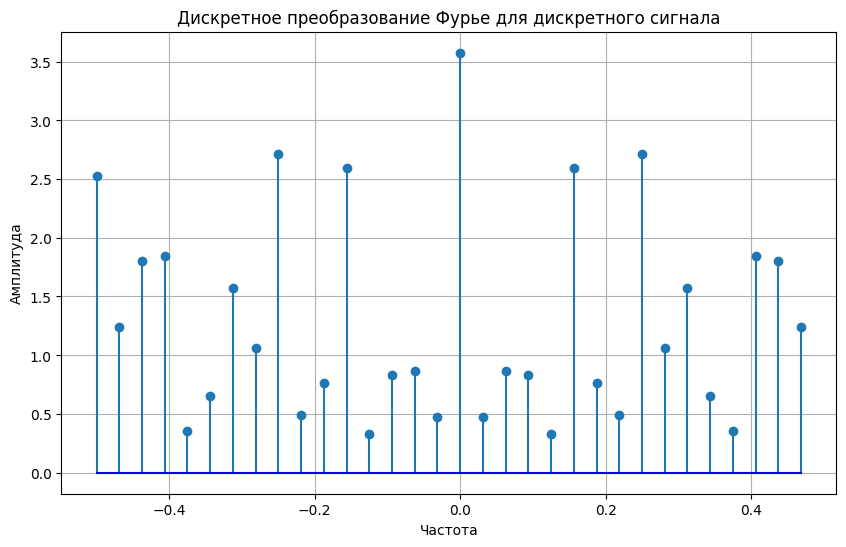

In [4]:
# Генерации массива частот для ДПФ
fft_freq_d = np.fft.fftfreq(N + 1, T)
# Вычисление ДПФ для дискретного сигнала
X = np.fft.fft(signal(time_d))

# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), basefmt="b")
plt.title('Дискретное преобразование Фурье для дискретного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

4. Необходимо для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула для линейного сглаживание по 5 точкам:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция:

$$H(\omega)=\frac{sin(\frac{5ω}{2})}{5sin(\frac{ω}{2})}$$

Формула для линейного сглаживание по 9 точкам:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция:

$$H(\omega)=\frac{sin(\frac{9ω}{2})}{9sin(\frac{ω}{2})}$$

In [5]:
def lin_smoothing_M(s, M):
    return np.convolve(s, (1 / M) *np.ones(M), mode='same')

smoothing_5 = lin_smoothing_M(signal(time_d), 5)
smoothing_9 = lin_smoothing_M(signal(time_d), 9)

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

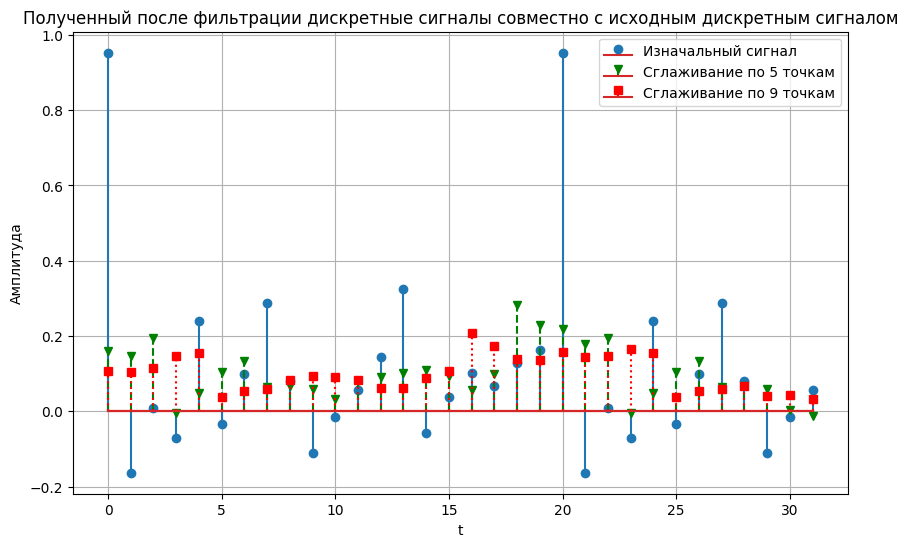

In [6]:
plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, smoothing_5, linefmt="g--",  markerfmt="v",
label="Сглаживание по 5 точкам")
plt.stem(time_d, smoothing_9, linefmt="r:", markerfmt="s",
label="Сглаживание по 9 точкам")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('Полученный после фильтрации дискретные сигналы совместно с исходным дискретным сигналом')
plt.legend()
plt.grid()
plt.show()

6. С помощью ДПФ необходимо найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

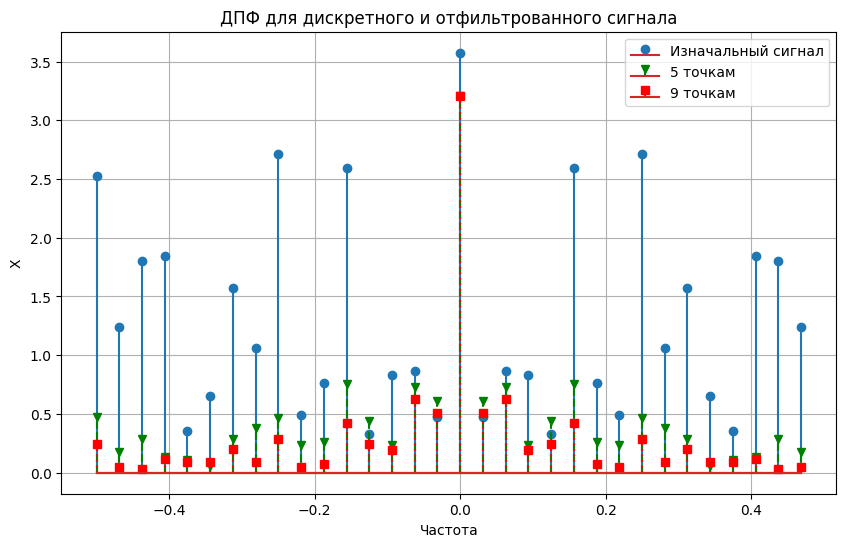

In [7]:
# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(smoothing_5)),
         linefmt="g--",
         markerfmt="v",
         label="5 точкам")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(smoothing_9)),
         linefmt="r:",
         markerfmt="s",
         label="9 точкам")

plt.title('ДПФ для дискретного и отфильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

7. Проанализируем результат на соответствие значениям $H(\omega)$. Сделаем выводы.

Из результатов анализа спектра следует:
1. Присутствует полоса пропускания в окрестностях нулевой частоты.
2. Сигналы с частотами около 0 ослабевают менее значительно, в то время как высокочастотные сигналы заметно потухают.
3. С увеличением числа точек подавление высоких частот увеличивается.

8. Повторим п. 4–7 для следующих фильтров:

  a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

  b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

8.a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

Формула для сглаживание полинома второй степени по 5 точкам:

$$y_{n} = \frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$

Передаточная функция:

$$H(\omega)=\frac{17+24cos(\omega)-6cos(2\omega)}{35}$$

Формула для сглаживание полинома второй степени по 9 точкам:

$$y_{n} = \frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$

Передаточная функция:

$$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

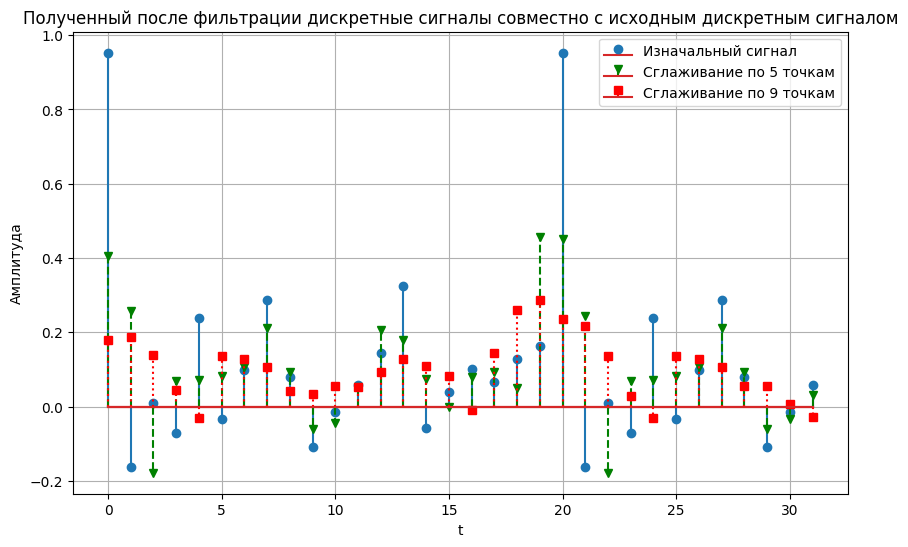

In [8]:
X_degree_2_points_5 = np.convolve(signal(time_d), np.array([-3, 12, 17, 12, -3]), 'same') / 35
X_degree_2_points_9 = np.convolve(signal(time_d), np.array([-21, 14, 39, 54, 59, 54, 39, 14, - 21]), 'same') / 231

plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, X_degree_2_points_5, linefmt="g--",  markerfmt="v",
label="Сглаживание по 5 точкам")
plt.stem(time_d, X_degree_2_points_9, linefmt="r:", markerfmt="s",
label="Сглаживание по 9 точкам")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('Полученный после фильтрации дискретные сигналы совместно с исходным дискретным сигналом')
plt.legend()
plt.grid()
plt.show()

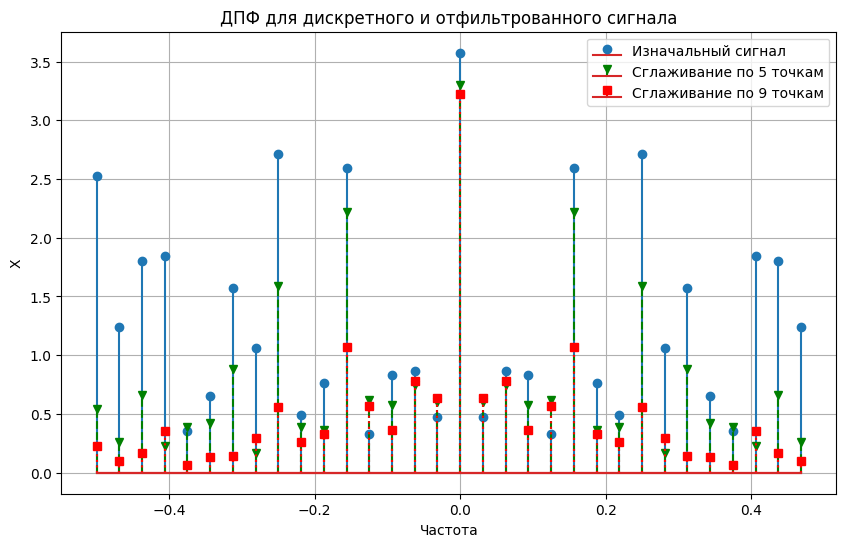

In [9]:
# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")
plt.stem(fft_freq_d, np.abs(np.fft.fft(X_degree_2_points_5)), linefmt="g--",  markerfmt="v", label="Сглаживание по 5 точкам")
plt.stem(fft_freq_d, np.abs(np.fft.fft(X_degree_2_points_9)), linefmt="r:", markerfmt="s", label="Сглаживание по 9 точкам")

plt.title('ДПФ для дискретного и отфильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

Полоса пропускания сигнала стала более широкой по сравнению с предыдущим этапом, при этом амплитуды других компонент сигнала существенно снижены. Выводы относительно передаточной функции также cоответствуют предыдущим результам.

8.b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Формула для сглаживание полинома 4-ой степени по 7 точкам:

$$y_{n}=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+65x_{n+1}-30x_{n+2}+5x_{n+3})$$

Передаточная функция:

$$H(\omega)=\frac{131+150cos(\omega)-60cos(2\omega)+10cos(3\omega)}{231}$$

Формула для сглаживание полинома 4-ой степени по 11 точкам:

$$y_{n}=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}+10x_{n+3}-45x_{n+4}+18x_{n+5})$$

Передаточная функция:

$$H(\omega)=\frac{143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega)}{429}$$

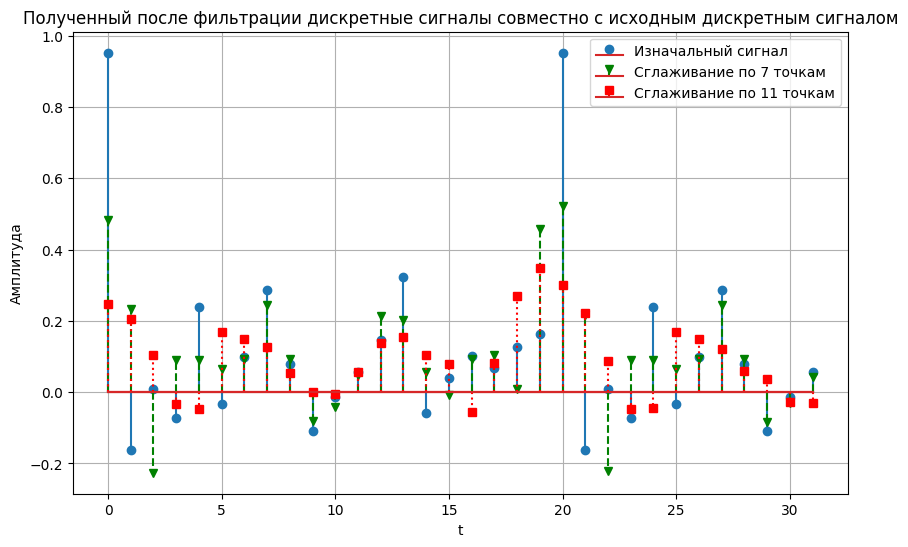

In [10]:
X_degree_4_points_7 = np.convolve(signal(time_d), np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
X_degree_4_points_11 = np.convolve(signal(time_d), np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, X_degree_4_points_7, linefmt="g--",  markerfmt="v",
label="Сглаживание по 7 точкам")
plt.stem(time_d, X_degree_4_points_11, linefmt="r:", markerfmt="s",
label="Сглаживание по 11 точкам")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('Полученный после фильтрации дискретные сигналы совместно с исходным дискретным сигналом')
plt.legend()
plt.grid()
plt.show()

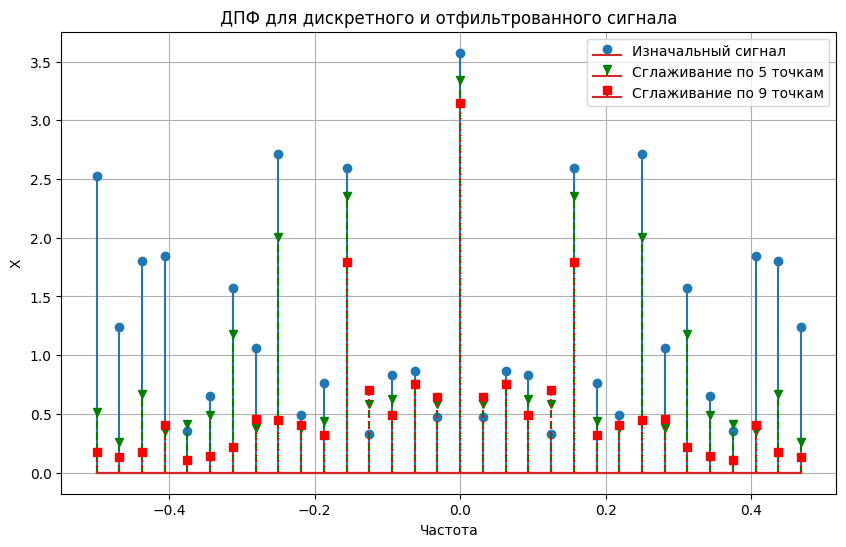

In [11]:
# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")
plt.stem(fft_freq_d, np.abs(np.fft.fft(X_degree_4_points_7)), linefmt="g--",  markerfmt="v", label="Сглаживание по 5 точкам")
plt.stem(fft_freq_d, np.abs(np.fft.fft(X_degree_4_points_11)), linefmt="r:", markerfmt="s", label="Сглаживание по 9 точкам")

plt.title('ДПФ для дискретного и отфильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

Изменения в значениях дискретных отсчетов спектра соответствуют значениям передаточных функций. Выводы относительно передаточной функции также cоответствуют предыдущим результам. Помимо этого, чем выше степень полинома, служащего для сглаживания, тем выше порядок касания у нулевой частоты.

## Выводы

Было проведено исследование результов фильтрации дискретного сигнала с использованием нерекурсивных фильтров, построенных на основе полиномиальных приближений:

1. Был смоделирован аналоговый сигнал в виде линейной комбинации косинусоид, после чего произведена его дискретизация.

1. Применено дискретное преобразование Фурье (ДПФ) для нахождения спектра дискретного сигнала. Полученные отсчеты спектра были визуализированы, что дало представление о частотных составляющих сигнала.

2. Были использованы фильтры сглаживания на основе полиномов различных степеней и узлов. Полученные дискретные сигналы после применения фильтров были визуализированы.

3. Были применены ДПФ для определения спектра дискретного сигнала после фильтрации для различных степеней и узлов.

4. Наблюдается согласованность между изменениями в значениях дискретных отсчетов спектра и значениями передаточных функций.
